In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras import Model
from keras.layers import Dense
from keras.layers import Flatten
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from PIL import Image

**VGG 16 DATASET**

Very deep Convolutional Neural Network

21 layers

13 convolutional layers of 3x3 filter with stride 1

5 max pooling layers of 2x2 filter of stride 2

3 fully connected layers

Trained on ImageNet dataset with over 1 million images and can classify into 1000 categories

Available on Keras


In [ ]:
model = VGG16()

553467096/553467096 [==============================] - 6s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
img_path1 = '/content/cat.jpeg'

img1 = image.load_img(img_path1, target_size = (224,224))

img_path2 = '/content/car.jpg'

img2 = image.load_img(img_path2, target_size = (224,224))

img_path3 = '/content/banana.jpg'

img3 = image.load_img(img_path3, target_size = (224,224))

In [ ]:
def predict(img1):
  plt.imshow(img1)
  x = image.img_to_array(img1)
  x = np.expand_dims(x,axis=0)
  x - preprocess_input(x)
  img_class = model.predict(x)

  from keras.applications.imagenet_utils import decode_predictions
  predict_class = decode_predictions(img_class)
  print(predict_class)

35363/35363 [==============================] - 0s 0us/step
[[('n02124075', 'Egyptian_cat', 0.65725017), ('n02123045', 'tabby', 0.1962541), ('n02123159', 'tiger_cat', 0.05255562), ('n02127052', 'lynx', 0.00957945), ('n02123394', 'Persian_cat', 0.008695163)]]


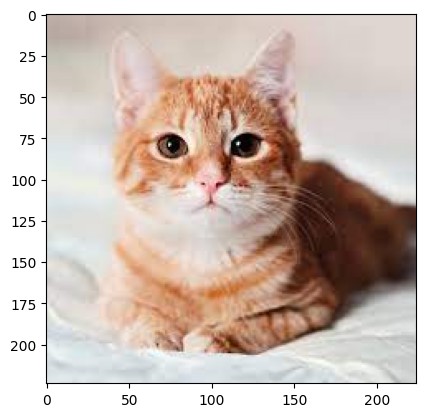

In [ ]:
predict(img1)

1/1 [==============================] - 1s 642ms/step
[[('n04285008', 'sports_car', 0.8135844), ('n04037443', 'racer', 0.0754093), ('n03100240', 'convertible', 0.060510322), ('n02974003', 'car_wheel', 0.028567463), ('n02930766', 'cab', 0.009828021)]]


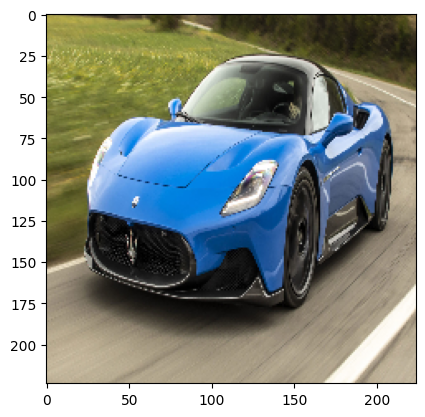

In [ ]:
predict(img2)

1/1 [==============================] - 1s 630ms/step
[[('n07753592', 'banana', 0.6210879), ('n03065424', 'coil', 0.12314494), ('n03461385', 'grocery_store', 0.11749417), ('n01914609', 'sea_anemone', 0.019360885), ('n12144580', 'corn', 0.014197915)]]


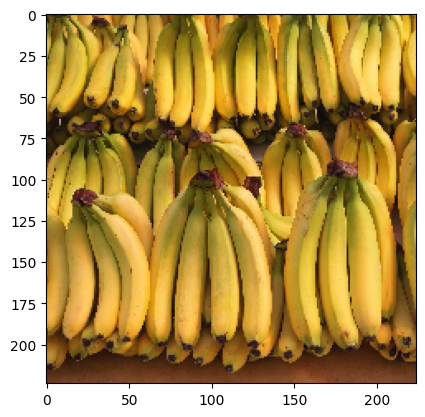

In [ ]:
predict(img3)

In [ ]:
model1 = VGG16()
model1 = Model(inputs = model1.inputs, outputs = model1.layers[-2].output)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model2 = VGG16(include_top = False, input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
flat1 = Flatten()(model2.layers[-1].output)
classifier_layer = Dense (1024, activation = 'softmax')(flat1)
model3 = Model(inputs = model2.inputs, outputs = classifier_layer)

In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
for layer in model3.layers:
  layer.trainable = False

In [ ]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
data = []
data.append(np.array(img1))
data.append(np.array(img2))
data.append(np.array(img3))
data = np.array(data)
data

array([[[[193, 178, 171],
         [193, 178, 171],
         [192, 177, 170],
         ...,
         [223, 214, 209],
         [222, 214, 211],
         [222, 214, 212]],

        [[193, 178, 171],
         [192, 177, 170],
         [192, 177, 170],
         ...,
         [223, 214, 209],
         [222, 214, 211],
         [222, 214, 212]],

        [[192, 177, 170],
         [192, 177, 170],
         [191, 176, 169],
         ...,
         [223, 214, 209],
         [222, 214, 211],
         [222, 214, 212]],

        ...,

        [[222, 230, 233],
         [222, 230, 233],
         [222, 230, 233],
         ...,
         [211, 213, 212],
         [212, 214, 213],
         [213, 215, 214]],

        [[223, 231, 234],
         [223, 231, 234],
         [224, 232, 235],
         ...,
         [209, 211, 210],
         [210, 212, 211],
         [208, 210, 209]],

        [[224, 232, 235],
         [224, 232, 235],
         [224, 232, 235],
         ...,
         [208, 210, 209],
        

In [ ]:
targets = [0, 0, 1]
targets = to_categorical(targets, num_classes=2)
targets

array([[1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
model3 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = model3.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model3 = Model(inputs=model3.input, outputs=predictions)

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.fit(data, targets, epochs=5, batch_size=32)

Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 30.5484 - accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 8s 8s/step - loss: 1.9096 - accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 6s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
def preprocess_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def predict_class(model, img_path):
    x = preprocess_img(img_path)
    prediction = model.predict(x)
    class_label = np.argmax(prediction)
    probabilities = prediction[0] * 100
    if class_label == 0:
        print(f"The image is predicted to belong to the first class with {probabilities[0]:.2f}% probability.")
    else:
        print(f"The image is predicted to belong to the second class with {probabilities[1]:.2f}% probability.")

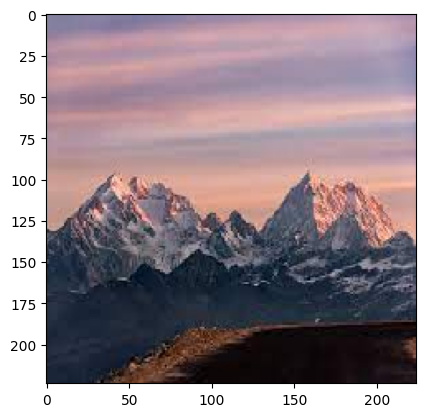

1/1 [==============================] - 1s 1s/step
The image is predicted to belong to the first class with 71.02% probability.


In [ ]:
img_path4 = '/content/mountain.jpeg'
predict_class(model3, img_path4)